# 파이썬을 활용한 데이터 처리

- 기본적으로 파이썬의 pandas 라이브러르리를 사용하여 진행한다.

###### 목차
0. 데이터 전처리 Overview
1. 데이터 프레임 변경
2. 데이터 프레임 결합
3. 시계열 데이터 처리
4. 데이터 분석 방법론
5. 시각화
6. 다변량 분석 - 숫자형
7. 다변량 분석 - 범주형

In [3]:
# 기본 라이브러리 import 하기
import pandas as pd
import numpy as np

## 0. 데이터 전처리 Overview
1. 데이터 구조 만들기
2. 모델링을 위한 전처리
---
##### 1. 데이터 구조 만들기
행 : 분석 단위  
열 : 정보, 변수

즉, 행을 어떻게 결정하느냐가 중요한 포인트가 된다.

##### 2. 모델링을 위한 전처리
모든 셀은 값이 있어야한다.  
모든 값은 숫자여야 한다  
필요시, 숫자의 범위를 맞춰야 한다.

## 1. 데이터 프레임 변경
- 열 추가 : 새로운 열 이름에 값을 지정하면, 새 열이 추가 된다.
- 열 이름 변경 : rename()
- 열 삭제 : drop()
    - axis = 0 : 행 삭제(기본값)
    - axis = 1 : 열 삭제
    - inplace = False : 삭제한 것처럼 보여줘, True: 진짜 삭제하기
- map() : 기존 값을 다른 값으로 매핑(변경)
- pd.map() : 기존 값을 다른 값으로 매핑(변경)

In [4]:
df = pd.DataFrame() # 데이터 프레임 만들기


# 열 추가 : '성별' 컬럼 추가하기
df["성별"] = ['남성','여성','여성','여성','남성']
df["나이"] = [17, 22, 21, 8, 22] 
df["값변경"]=[1, 2, 3, 4, 5]
df["값들"]=[1.2, 2.6, 3.3, 4.9, 5]
df["테스트"]=[0,0,0,0,0]
df["테스트2"]=[0,0,0,0,0]
df["테스트3"]=[0,0,0,0,0]
df

,성별,나이,값변경,값들,테스트,테스트2,테스트3
0,남성,17,1,1.2,0,0,0
1,여성,22,2,2.6,0,0,0
2,여성,21,3,3.3,0,0,0
3,여성,8,4,4.9,0,0,0
4,남성,22,5,5.0,0,0,0


In [5]:
# 열 이름 변경 : rename()
df.rename(columns={'성별' : 'Sex',
                    '나이' : 'Age'}, inplace=True)
df

,Sex,Age,값변경,값들,테스트,테스트2,테스트3
0,남성,17,1,1.2,0,0,0
1,여성,22,2,2.6,0,0,0
2,여성,21,3,3.3,0,0,0
3,여성,8,4,4.9,0,0,0
4,남성,22,5,5.0,0,0,0


In [6]:
# 열 삭제 : drop()
df.drop('테스트',axis=1, inplace=True)
df

,Sex,Age,값변경,값들,테스트2,테스트3
0,남성,17,1,1.2,0,0
1,여성,22,2,2.6,0,0
2,여성,21,3,3.3,0,0
3,여성,8,4,4.9,0,0
4,남성,22,5,5.0,0,0


In [7]:
# 열 삭제 : drop()
df.drop(['테스트2','테스트3'],axis=1, inplace=True)
df

,Sex,Age,값변경,값들
0,남성,17,1,1.2
1,여성,22,2,2.6
2,여성,21,3,3.3
3,여성,8,4,4.9
4,남성,22,5,5.0


In [8]:
# 열 전체 값 변경
df['값변경']=0
df

,Sex,Age,값변경,값들
0,남성,17,0,1.2
1,여성,22,0,2.6
2,여성,21,0,3.3
3,여성,8,0,4.9
4,남성,22,0,5.0


In [9]:
# 조건에 의한 값 변경 1
df.loc[df['Age']< 10, '값변경'] = 10 # 'Age' 컬럼에서 값이 10 미만일 경우, '값변경' 컬럼의 값을 10으로 변경
df

,Sex,Age,값변경,값들
0,남성,17,0,1.2
1,여성,22,0,2.6
2,여성,21,0,3.3
3,여성,8,10,4.9
4,남성,22,0,5.0


In [10]:
# 조건에 의한 값 변경 2
df['값변경'] = np.where(df['Age'] == 22, 5, 1) # 'Age'의 값이 22이면 '값변경'컬럼의 값을 5로, 아닐경우 1로 변경
df

,Sex,Age,값변경,값들
0,남성,17,1,1.2
1,여성,22,5,2.6
2,여성,21,1,3.3
3,여성,8,1,4.9
4,남성,22,5,5.0


In [11]:
# pd.map() : 기존 값을 다른 값으로 매핑(변경)
df['Sex'] = df['Sex'].map({'남성':'Male',
                            '여성':'Female'})
df

,Sex,Age,값변경,값들
0,Male,17,1,1.2
1,Female,22,5,2.6
2,Female,21,1,3.3
3,Female,8,1,4.9
4,Male,22,5,5.0


In [12]:
# cut() : 값 크기를 기준으로 지정한 개수의 범위로 나눠어 범주 값 지정하기

# '값들'컬럼의 숫자형 값을 2개의 범위로 나눠 '값들범주'라는 컬럼 추가한다.
df['값들범주'] = pd.cut(df['값들'], 2, labels=['1구간','2구간']) 
df

,Sex,Age,값변경,값들,값들범주
0,Male,17,1,1.2,1구간
1,Female,22,5,2.6,1구간
2,Female,21,1,3.3,2구간
3,Female,8,1,4.9,2구간
4,Male,22,5,5.0,2구간


## 2. 데이터 프레임 결합
- pd.concat
    - 매핑 기준 : 인덱스(행), 컬럼이름(열)
    - 방향 : axis
    - 방법 : join  
        join의 경우 'outer' : 모든 행과 열 합치기(기본값), 'inner' : 같은 행과 열만 합치기
- pd.merge
    - 매핑기준 : 특정 컬럼(key)의 값 기준으로 결합
    - 데이터베이스 테이블 조인과 같음
    - 방법
        - inner : 같은 값만
        - outer : 모두
        - left : 왼쪽 df는 모두, 오른쪽 df는 같은 값만
        - right : 오른쪽 df는 모두, 왼쪽 df는 같은 값만
- pivot
    - Pivot 함수를 이용하여 집계된 데이터를 재구성할 수 있다.
    - 문법 : dataframe.pivot(index, column, values)
---
### 정리하자면 . . .
- concat : 인덱스, 열 이름 기준 => **데이터 프레임 구조**에 맞게 합치기
- merge : 특정 열의 값 기준 => **데이터 값 기준**으로 합치기
- pivot : 먼저 groupby로 집계하고, pivot(index, column, value)

## 3. 시계열 데이터 처리
시계열 데이터란 행과 행에 시간의 순서(흐름)가 있고  
행과 행의 시간 간격이 동일한 데이터를 말한다.
- 날짜 데이터 요소
![날짜요소뽑기](../img/날짜요소뽑기.png)
- shift() : 시계열 데이터에서 시간의 흐름 전후로 정보를 이동시킬 때 사용
- rolling().mean() : 시간의 흐름에 따라 일정 기간 동안 평균을 이동하면서 구하기
- diff() : 특정 시점 데이터, 이전 시점 데이터와의 차이 구하기

## 4. 데이터 분석 방법론
1. 가설 수립
    - 문제를 정의하고 요인을 파아갛기 위해서 가설을 수립힌다.
    - 가설 수립 절차
        1. 해결해야 할 문제가 무엇인가? (**목표, 관심사, y**)
        2. Y를 설명하기 위한 **요인**을 찾아라 (**x**)
        3. 가설의 구조를 정의하라(**x -> y**)
2. 데이터 이해하기
    - (초기)가설에서 도출된 데이터의 원본을 확인
    - 데이터 탐색
        - EDA 탐색적 데이터 분석 : 개별 데이터이 분포, 가설이 맞는지 파악, NA나 이상치 파악
        - CDA 확증적 데이터 분석 : 탐색으로 파악하기 애매한 정보는 통계적 분석 도구(가설 검정) 사용
        - 다음 순서로 EDA 및 CDA를 진행한다.
            1. 단변량 분석 : 개별 변수의 분포
            2. 이변량 분석 : feature와 target 간의 관계 (가설을 확인하는 단계)
            3. 이변량 분석 2: feature들 간의 관계
3. 데이터 준비하기
    - 모든 셀에 값이 있어야 한다.
    - 모든 값은 숫자 이어야 한다.
    - (옵션) 값의 범위를 일치시켜야 한다.
    - 수행 되는 내용은 아래와 같다
        1. 결측치 조치
        2. 가변수화
        3. 스케일링
        4. 데이터 분할
4. 모델링 하기
    - 중요 변수를 선택하고, 적절한 알고리즘을 적용하여 예측 모델을 생성한다.
    - 생성된 모델을 평가한다.
    - 수행 되는 내용은 아래와 같다.
        1. 중요 변수 선정
        2. 모델 생성
        3. 모델 성능 검증
    - 모델링(학습 Learning, Training)
        - 데이터로부터 패턴을 찾는 과정.
        - 오차를 최소화하는 패턴
        - 결과물 : 모델(모델은 수학식으로 표현됨)
    - 모델링을 위해 필요한 두가지
        - 학습 데이터
        - 알고리즘
5. 평가하기
    - 모델에 대한 데이터 분석 목표와 비지니스 목표 달성에 대한 평가
    - 모델과 데이터에서 추출한 패턴이 진정한 규칙성을 갖고 있는지, 단지 특정 예제 데이터에서만 볼 수 있는 특이한 성질은 아닌지 확인
    - 비지니스 목표에 부합되는지 보장
    - 수행되는 내용은 아래와 같다.
        - 모델에 대한 최종 평가 : TestSet이용
        - 비지니스 기대가치 평가
6. 배포하기
    - 프로젝트 결과물 최종 확정 : 프로덕션 환경의 파이프라인, 모델 및 배포가 고객 목표를 충족하는지 확인
    - 운영시스템에서 품질(성능 목표) 유지 기준을 정하고, 모니터링 계획을 수립
    - 수행되는 내용은 아래와 같다.
        1. 시스템 유효성 검사 : 배포된 모델과 요구 사항을 충족하는지 확인
        2. 프로젝트 이전 : 운영 환경으로 배포
        3. 데이터 수집부터 모델 배포 관리까지 파이프라인으로 구성해야 함

## 5. 시각화
#### 데이터의 시각화
```
데이터에는 비지니스가 담겨 있다.
데이터 시각화의 목적은 통계적인 해석을 넘어 비지니스의 인사이트를 파악하는 것이다.
```
##### 한계
```
- 그래프와 통계량에는 요약된 정보가 표현된다.
- 요약을 하는 관점에 따라 해석의 결과가 달라질 수 있다.
- 어떤 식으로 든 요약을 하면, 정보의 손실이 발생하게 된다.
```
##### 라이브러리
```
- matplotlib
    - 기본 코드 구조는 아래와 같다
        1. 라이브러리 불러오기(편의를 위해, plt로 명칭한다)
        2. plt.plot() : 기본 라인 차트를 그린다
        3. plt.show() : 그래프를 화면에 출력한다
- seaborn
```

In [14]:
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 실습 데이터 받기 및 확인
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/airquality_simple2.csv'
data = pd.read_csv(path)
data['Date'] = pd.to_datetime(data['Date'])
data.dropna(axis = 0, inplace = True)
data.head()

,Ozone,Solar.R,Wind,Temp,Date
0,34.0,286.0,8.6,78.0,1973-06-01
1,29.0,287.0,9.7,74.0,1973-06-02
2,18.0,242.0,16.1,67.0,1973-06-03
3,48.0,186.0,9.2,84.0,1973-06-04
4,49.0,220.0,8.6,85.0,1973-06-05


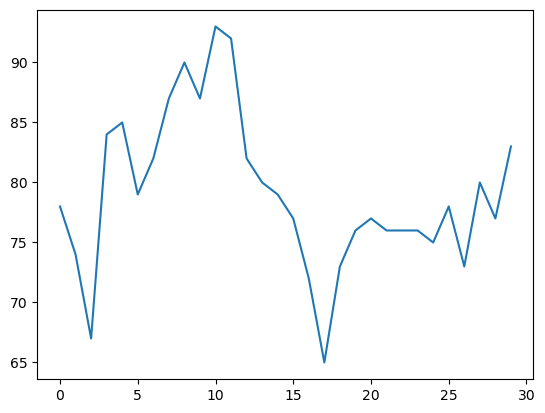

In [16]:
# 차트 그리기
plt.plot(data['Temp'])

# 화면에 보여주기
plt.show()

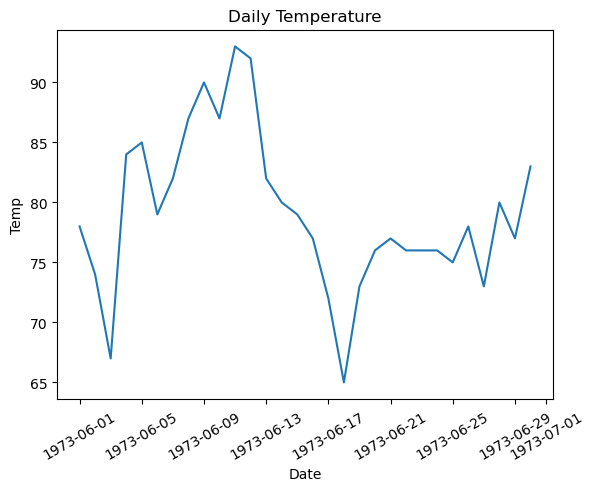

In [20]:
# 그래프 꾸미기 1 
plt.plot('Date', 'Temp', data = data) # plt.plot(x축, y축, data = )
plt.xticks(rotation = 30) # plt.xticks(rotation = 각도)
plt.xlabel('Date') # plt.xlabel() : x축 레이블 붙이기
plt.ylabel('Temp') # plt.ylabel() : y축 레이블 붙이기
plt.title('Daily Temperature') # plt.title() : 그래프 타이틀 붙이기
plt.show()

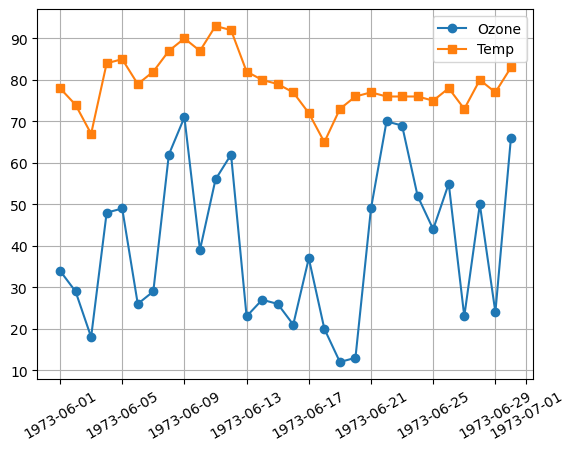

In [25]:
# 그래프 꾸미기 2
# 라인스타일 조정 및 그래프 겹치기
plt.plot(data['Date']
        , data['Ozone']
        , marker='o'
        , label = 'Ozone')
plt.plot(data['Date']
        , data['Temp']
        , marker='s'
        , label = 'Temp')
plt.xticks(rotation = 30) # plt.xticks(rotation = 각도)

plt.legend()

plt.grid()

plt.show()

## 6. 다변량 분석 - 숫자형

## 7. 다변량 분석 - 범주형